#### House pricing competiton.  ►  Aim - 50 procentile

#### First of all. ETL phase

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = r'C:\Users\Gev\Desktop\Data science\house-prices-advanced-regression-techniques\files\train.csv'

In [4]:
df = pd.read_csv(path, index_col = 0)

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_p1 = df.iloc[:,:20]

In [7]:
df_p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Street        1460 non-null   object 
 5   Alley         91 non-null     object 
 6   LotShape      1460 non-null   object 
 7   LandContour   1460 non-null   object 
 8   Utilities     1460 non-null   object 
 9   LotConfig     1460 non-null   object 
 10  LandSlope     1460 non-null   object 
 11  Neighborhood  1460 non-null   object 
 12  Condition1    1460 non-null   object 
 13  Condition2    1460 non-null   object 
 14  BldgType      1460 non-null   object 
 15  HouseStyle    1460 non-null   object 
 16  OverallQual   1460 non-null   int64  
 17  OverallCond   1460 non-null   int64  
 18  YearBuilt     1460 non-null 

In [8]:
# There are only two columns with less than 1460 values
# As 'Alley' column has insignificant amount of values, I'll just drop this col

In [9]:
df_p1.drop(columns = ['Alley'], inplace = True)

In [10]:
df_p1.loc[:,'LotFrontage'].describe(percentiles = [0.25, 0.5, 0.75, 0.8, 0.9, 0.95])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
80%        85.000000
90%        96.000000
95%       107.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
df_p1['LotFrontage'].sort_values(ascending = False).iloc[:5]

Id
1299    313.0
935     313.0
1128    182.0
198     174.0
232     174.0
Name: LotFrontage, dtype: float64

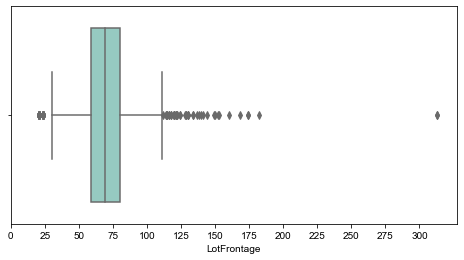

In [12]:
plt.figure(figsize = (8,4))
boxplot = sns.boxplot(x = 'LotFrontage', data = df_p1, palette = 'Set3')
sns.set_style('whitegrid')
boxplot.set_xticks(list(range(0,325,25)))
plt.show()

In [13]:
df_p1.loc[df_p1['LotFrontage'] > 275, 'LotFrontage'] = df['LotFrontage'] - 138
df_p1.loc[df_p1['LotFrontage'] > 175, 'LotFrontage'] = df['LotFrontage'] - 10

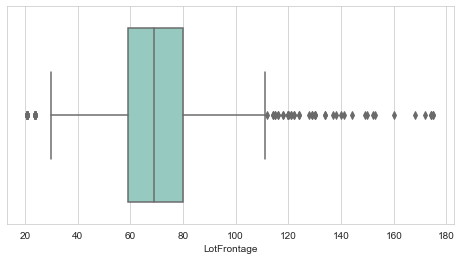

In [14]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'LotFrontage', data = df_p1, palette = 'Set3')
boxplot.set_xticks(list(range(0,250,25)))
plt.show()

In [15]:
df_p1.LotFrontage.describe()

count    1201.000000
mean       69.811823
std        22.536479
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       175.000000
Name: LotFrontage, dtype: float64

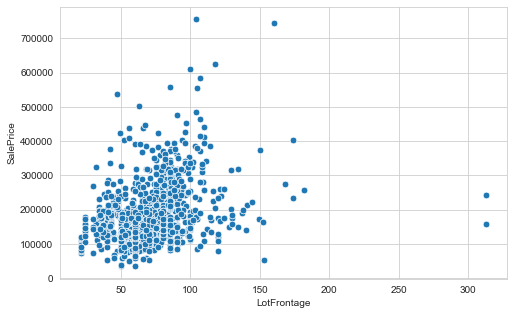

In [16]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = df[['LotFrontage', 'SalePrice']], x = 'LotFrontage', y = 'SalePrice', s = 45)
plt.show()

#### From here we can see, that houses with extremly large LotFrontage dont have extremly high prices. So I think I can freely reduce them

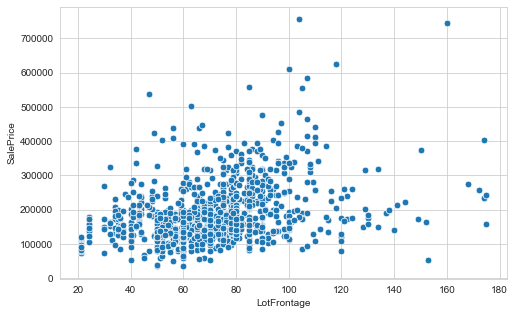

In [17]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = df_p1['LotFrontage'], y = df['SalePrice'], s = 45)
plt.show()

In [18]:
df_p1.loc[df_p1['LotFrontage'].isna() == True, 'LotFrontage'] = int(df_p1['LotFrontage'].mean())

In [19]:
# Handling data types

In [20]:
df_p1.dtypes

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
dtype: object

In [21]:
for col in df_p1.columns[4:-4]:
    df_p1[col] = df_p1[col].astype('category')
    
df_p1['MSZoning'] = df_p1['MSZoning'].astype('category')

In [22]:
df_p1['YearBuilt'] = pd.to_datetime(df_p1['YearBuilt'], format = '%Y')
df_p1['YearRemodAdd'] = pd.to_datetime(df_p1['YearRemodAdd'], format = '%Y')

In [23]:
df_p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MSSubClass    1460 non-null   int64         
 1   MSZoning      1460 non-null   category      
 2   LotFrontage   1460 non-null   float64       
 3   LotArea       1460 non-null   int64         
 4   Street        1460 non-null   category      
 5   LotShape      1460 non-null   category      
 6   LandContour   1460 non-null   category      
 7   Utilities     1460 non-null   category      
 8   LotConfig     1460 non-null   category      
 9   LandSlope     1460 non-null   category      
 10  Neighborhood  1460 non-null   category      
 11  Condition1    1460 non-null   category      
 12  Condition2    1460 non-null   category      
 13  BldgType      1460 non-null   category      
 14  HouseStyle    1460 non-null   category      
 15  OverallQual   1460 non-null   int64   

In [24]:
# Feature selection

In [25]:
df_p1 = df_p1.join(df['SalePrice'])

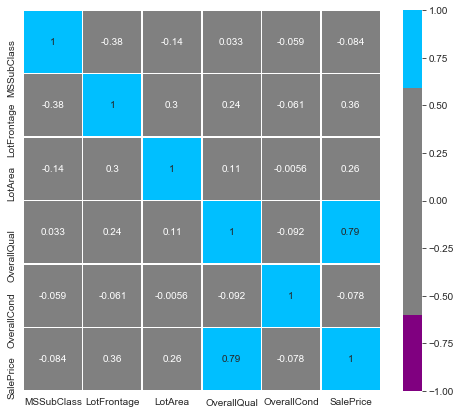

In [26]:
plt.figure(figsize = (8,7))
corr = df_p1.corr() # Corelation matrix
cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue'] # color map

sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

plt.show()

In [27]:
cat_col = list(df_p1.columns[4:-5]) # Categorical columns
cat_col.append('MSZoning')

In [28]:
for col in cat_col:
    
    categories = (list(df_p1[col].cat.categories)) # All values of column
    number_of_categories = len(categories)
    replace_list = list(range(number_of_categories)) # Number equivalents of categories
    replace_dict = {}
    
    for i in range(number_of_categories): # Making replace dict
        replace_dict[categories[i]] = replace_list[i]
    
    df_p1[col] = df_p1[col].replace(replace_dict)
    

In [29]:
cat_corr = df_p1.loc[:,cat_col].join(df.SalePrice).corr()

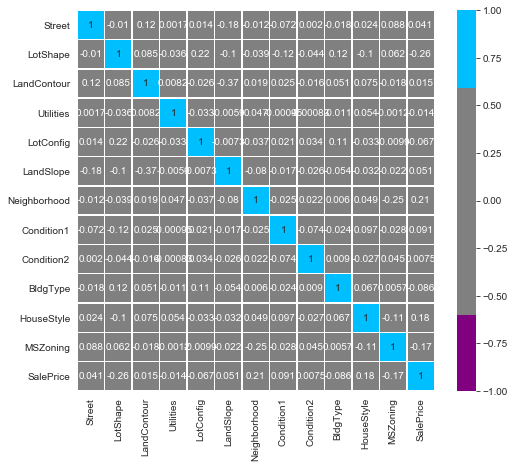

In [30]:
plt.figure(figsize = (8,7))
cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue'] # color map

sns.heatmap(cat_corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

plt.show()

#### I decided that, I'll take those features which have 'normal' distribution

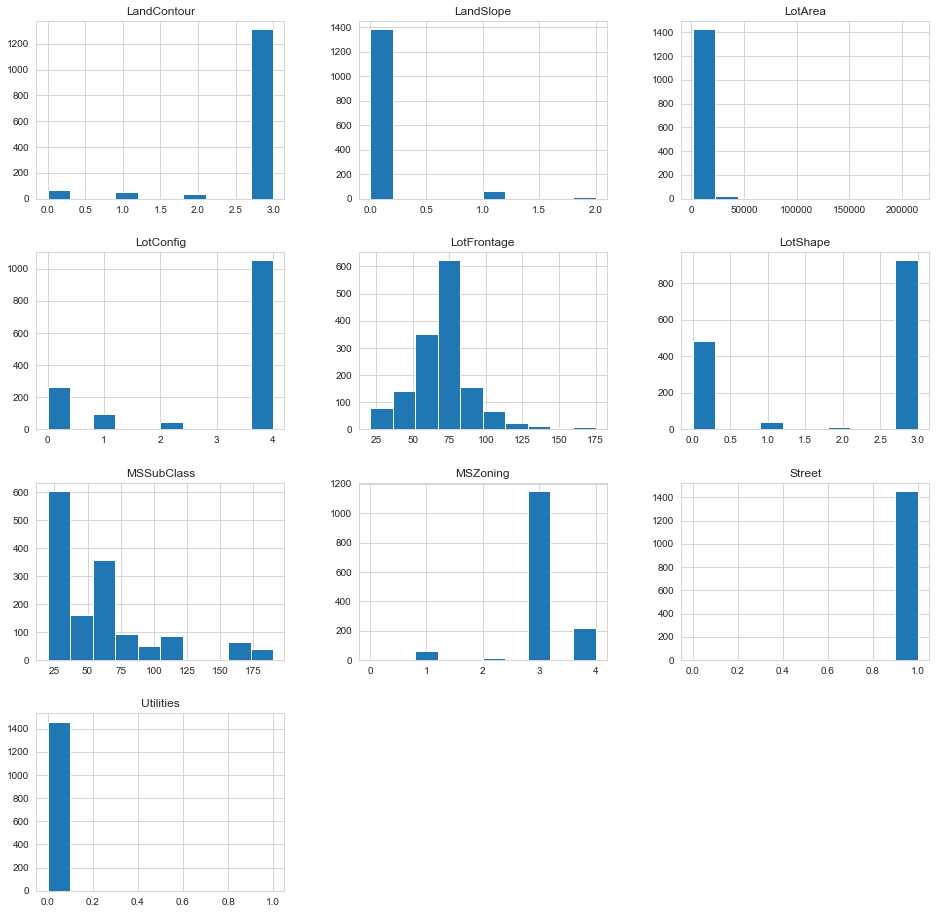

In [31]:
df_p1.iloc[:, :10].hist(figsize = (16,16))
plt.show()

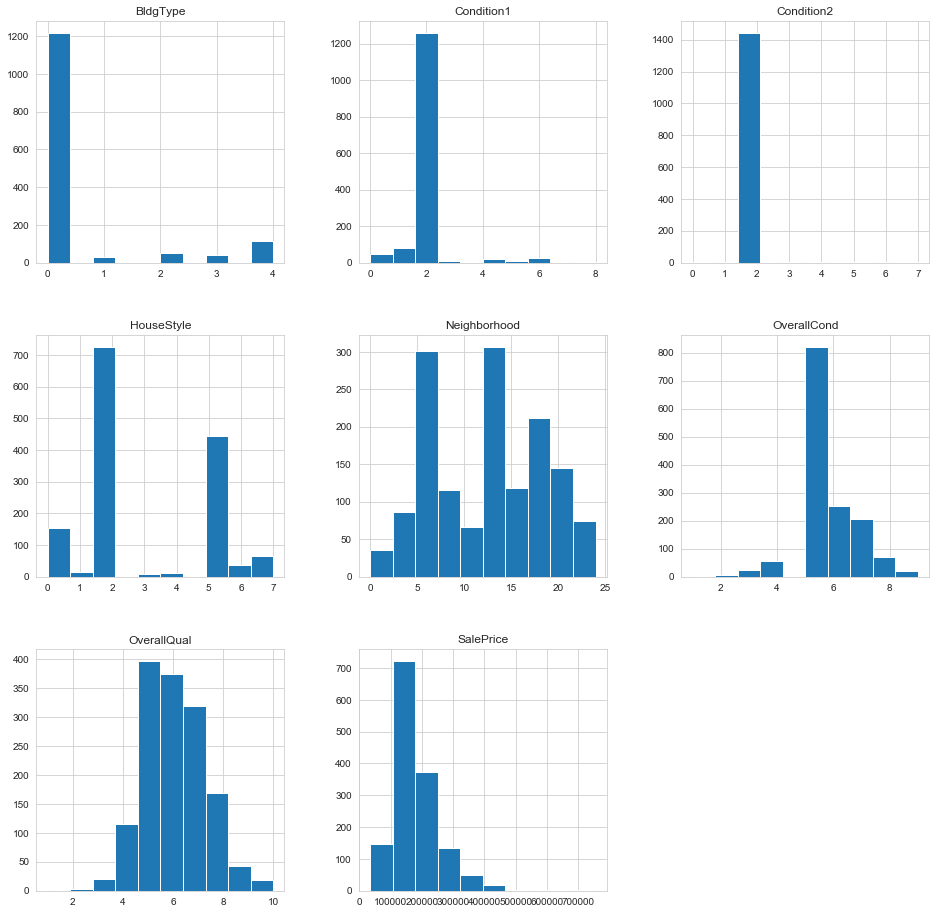

In [32]:
df_p1.iloc[:, 10:].hist(figsize = (16,16))
plt.show()

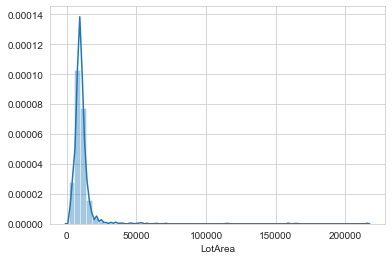

In [33]:
sns.distplot(df_p1['LotArea'])
plt.show()

In [34]:
df_p1['LotArea'].describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95]).to_frame()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
90%,14381.700000
95%,17401.150000
max,215245.000000


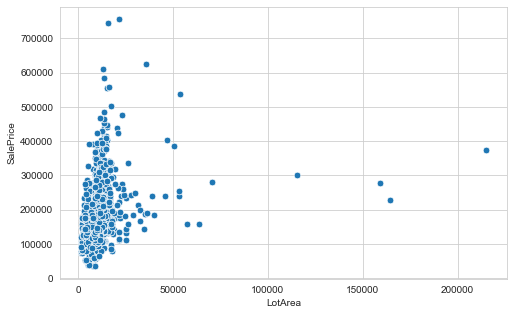

In [35]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = df_p1['LotArea'], y = df['SalePrice'], s = 45)
plt.show()

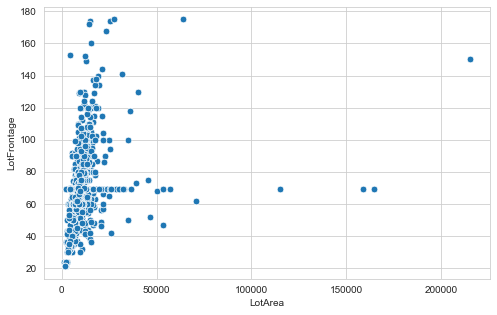

In [36]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = df_p1['LotArea'], y = df_p1['LotFrontage'], s = 45)
plt.show()

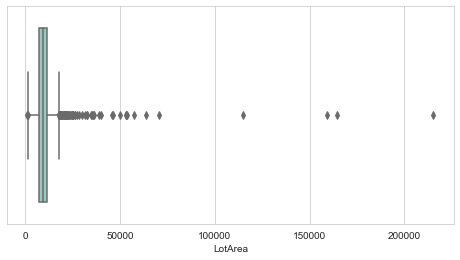

In [37]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'LotArea', data = df_p1, palette = 'Set3')
#boxplot.set_xticks(list(range(0,250,25)))
plt.show()

#### Read Me
A little explanation what was going on here for future me. As I cant understand what feature to use, I decided to use those that explain SalePrice in some way and have 'normal' distribution. I thought 'LotArea' should have normal distribution, so I wanted to check that. As a result I spoted 4 outliers, and descided to drop them as they are only 0.2 % of my data.

In [38]:
df_p1.drop(index =  list(df_p1[df['LotArea'] > 100000].index), inplace = True)

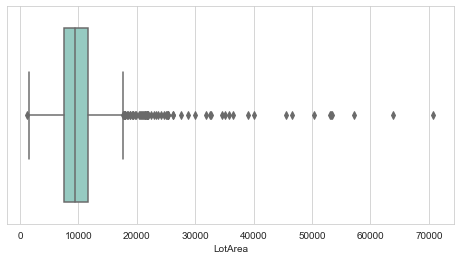

In [39]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'LotArea', data = df_p1, palette = 'Set3')
#boxplot.set_xticks(list(range(0,250,25)))
plt.show()

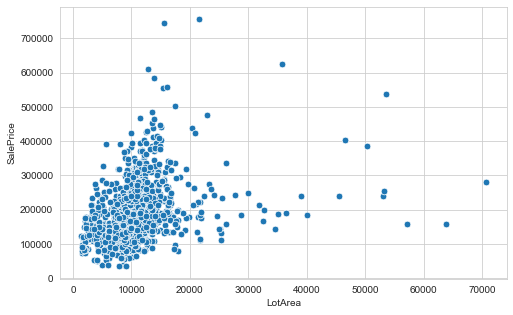

In [40]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = df_p1['LotArea'], y = df['SalePrice'], s = 45)
plt.show()

#### From first 10 - ['LotArea', 'LotFrontage', 'MSSubClass'] <br>
#### From second 10 - ['HouseStyle', 'Neighborhood', 'OverallCond','OverallQual']

In [41]:
# Lets drop all other columns and work with the rest

In [42]:
df_p1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'SalePrice'],
      dtype='object')

In [43]:
df_p1.drop(columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                      'Condition1', 'Condition2', 'BldgType'], inplace = True)

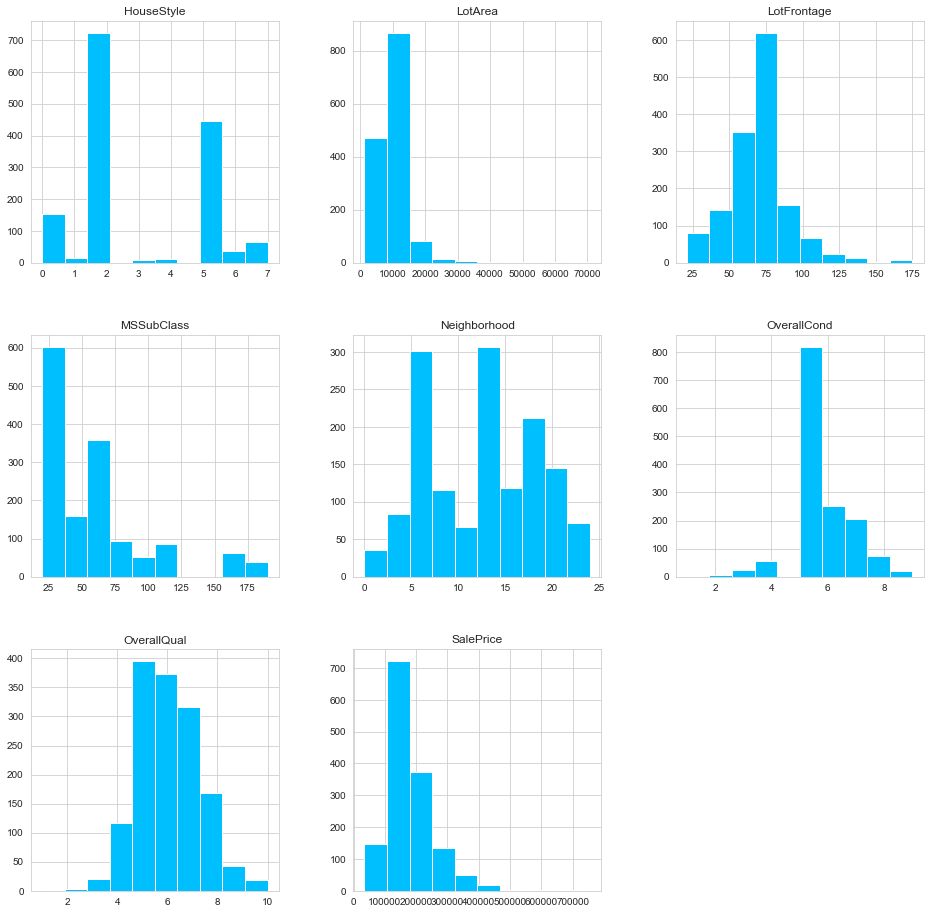

In [44]:
df_p1.hist(figsize = (16,16), color = 'deepskyblue')
plt.show()

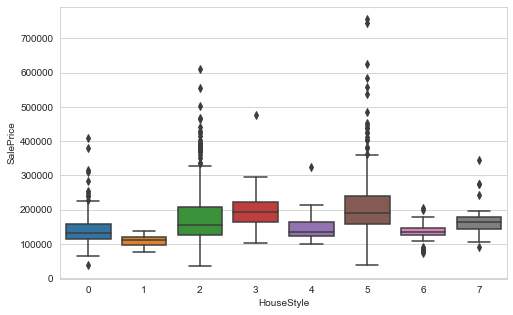

In [45]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df_p1['HouseStyle'], y = df['SalePrice'])
plt.show()

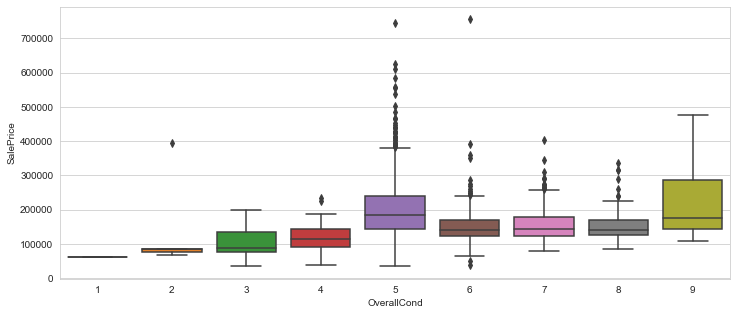

In [46]:
plt.figure(figsize = (12,5))
sns.boxplot(x = df_p1['OverallCond'], y = df['SalePrice'])
plt.show()

#### Model builbing
I'll try to build two regresion models with same parametrs first with housestyle and overallcond second without them

In [47]:
from sklearn import linear_model, model_selection, metrics

In [48]:
model1 = linear_model.Ridge()

In [49]:
model2 = linear_model.Ridge()

In [50]:
#rint(model_selection.cross_val_score(model1, X = df_p1.iloc[:,:-1], y = df_p1['SalePrice'], cv = 5, 
                                      #scoring = 'neg_mean_squared_log_error'))

In [51]:
df_p1.iloc[:,:-1].head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd
Id,,,,,,,,,
1,60,65.0,8450,5,5,7,5,2003-01-01,2003-01-01
2,20,80.0,9600,24,2,6,8,1976-01-01,1976-01-01
3,60,68.0,11250,5,5,7,5,2001-01-01,2002-01-01
4,70,60.0,9550,6,5,7,5,1915-01-01,1970-01-01
5,60,84.0,14260,15,5,8,5,2000-01-01,2000-01-01


In [52]:
model_data = df_p1[['LotFrontage', 'LotArea']].copy()

In [53]:
for col in ['MSSubClass', 'Neighborhood', 'OverallQual']:
    dummies = pd.get_dummies(df_p1[col])
    model_data = model_data.join(dummies, rsuffix = col)

In [54]:
pd.set_option('display.max_columns', None)

In [55]:
print(model_selection.cross_val_score(model1, X = model_data, y = df_p1['SalePrice'], cv = 5, 
                                      scoring = 'neg_mean_squared_log_error'))

[-0.02885668 -0.04919575 -0.03924976 -0.03849286 -0.03856134]


In [56]:
df_p1['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [57]:
model_data2 = model_data.iloc[:, :17]

In [58]:
print(model_selection.cross_val_score(model1, X = model_data2, y = df_p1['SalePrice'], cv = 5, 
                                      scoring = 'neg_mean_squared_log_error'))

[-0.08485008 -0.1002892  -0.09944688 -0.09462015 -0.09759624]


In [59]:
from sklearn import ensemble

In [60]:
forest = ensemble.RandomForestRegressor()

In [61]:
print(model_selection.cross_val_score(forest, X = model_data, y = df_p1['SalePrice'], cv = 5, 
                                      scoring = 'neg_mean_squared_log_error'))

[-0.03115869 -0.04719988 -0.03942144 -0.03917564 -0.03905566]


In [62]:
print(model_selection.cross_val_score(model1, X = model_data, y = df_p1['SalePrice'], cv = 5, 
                                      scoring = 'neg_mean_squared_log_error'))

[-0.02885668 -0.04919575 -0.03924976 -0.03849286 -0.03856134]


In [63]:
overall_data = model_data.iloc[:, :2].join(pd.get_dummies(df_p1['OverallQual']))

In [64]:
print(model_selection.cross_val_score(model1, X = overall_data, y = df_p1['SalePrice'], cv = 5, 
                                      scoring = 'neg_mean_squared_log_error'))

[-0.0396029  -0.0632031  -0.04348126 -0.04773142 -0.04533404]


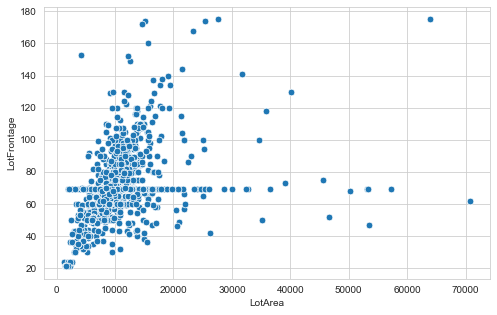

In [65]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = model_data['LotArea'], y = model_data['LotFrontage'], s = 45)
plt.show()

In [66]:
print(model_selection.cross_val_score(model1, X = np.array(model_data['LotArea']).reshape(-1,1), y = df_p1['SalePrice'], cv = 5, 
                                      scoring = 'neg_mean_squared_log_error'))

[-0.1245061  -0.16075316 -0.14365967 -0.13853918 -0.13836346]


In [67]:
print(model_selection.cross_val_score(model1, X = np.array(model_data['LotFrontage']).reshape(-1,1), y = df_p1['SalePrice'], cv = 5, 
                                      scoring = 'neg_mean_squared_log_error'))

[-0.13133182 -0.15307361 -0.15243494 -0.1421425  -0.14291576]


In [68]:
print(model_selection.cross_val_score(model1, X = model_data[['LotArea', 'LotFrontage']], y = df_p1['SalePrice'], cv = 5, 
                                      scoring = 'neg_mean_squared_log_error'))

[-0.12021509 -0.14712166 -0.13850919 -0.1370253  -0.13584127]


#### Simple summary
Was haben wir jetzt: *(What we have know)<br>
• From first 20 features I chose 2 continuous, and 3 categorical features. <br>
• There is mid correlation between those continuous features, but tests show that keeping both will help model. <br>
• From categorical features 'OverallQual' has the highest correlation with SalePrice, but other features didn't interfer its.<br>
• I thought that RandomForest would give more accurate results in contrast with Regression, but it didn't. Maybe later when I'll add more and more features it will happen.

In [70]:
model_data.to_csv(r'C:\Users\Gev\Desktop\Data science\house-prices-advanced-regression-techniques\Train_data\part1.csv')